In [1]:
import pandas as pd
import scipy
from scipy import stats
import statsmodels.api as sm
import pylab
from sklearn.preprocessing import MinMaxScaler, scale
from cProfile import label
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

# Read in Irish  and Australian data

In [2]:
irish = pd.read_csv('data/final/df_final_irish_beef_feat_cols_and_target_values_1999-2022.csv')

In [3]:
irish.head()

,Unnamed: 0,bullocks_200-249kg,bullocks_250-299kg,bullocks_300-349kg,bullocks_350-399kg,bullocks_400-449kg,bullocks_450-499kg,bullocks_500-549kg,bullocks_550kg+,heifers_200-249kg,...,pork_loin_chops_per_kg,pork_sausages_per_kg,pork_steak_per_kg,potatoes_10_kg,sherry_take_home_75cl_bottle,sirloin_steak_per_kg,stout_draught_bar_1_pint,tomatoes_per_kg,vodka_take_home_70cl_bottle,whiskey_take_home_70cl_bottle
0,1999-01-31,136.83,139.73,133.33,131.07,127.16,120.83,121.28,119.78,83.25,...,6.83387,3.92049,10.11682,6.99516,10.01776,10.42162,2.66192,2.36474,15.45209,17.31772
1,1999-02-28,143.80,140.10,130.93,126.85,122.36,121.99,118.89,122.60,72.94,...,6.92023,3.88620,10.05459,7.10311,10.18159,10.53465,2.66192,2.29743,15.46860,17.31645
2,1999-03-31,146.38,133.37,126.74,121.88,121.34,120.37,123.38,120.78,88.66,...,7.21741,3.89382,9.99236,7.06755,10.20953,10.41908,2.66192,2.10820,15.46098,17.31645
3,1999-04-30,141.20,131.58,121.23,119.14,120.69,124.75,122.41,122.15,76.94,...,7.18693,3.90017,9.81202,6.92150,10.24001,10.65911,2.69240,2.35077,15.42796,17.32788
4,1999-05-31,136.09,122.94,116.59,121.77,123.92,122.61,124.88,121.30,114.15,...,7.30631,3.92303,10.02411,6.83387,10.21715,10.78738,2.73558,2.13360,15.54480,17.63776


In [4]:
australian = pd.read_csv('data/final/df_final_australian_beef_feat_cols_and_target_values_1999-2020.csv')

In [5]:
australian.head()

,Unnamed: 0,beef_per_kg,meat_consumption,meat_exports,meat_imports,meat_distribution,meat_supply,cattle_production,swine_production_x,barley_production,...,sheep_slaughterings,cpi_all,cpi_residential,cpi_all_ex_food_energy,cpi_food,cpi_prod_index,diesel,petrol,pbeefusdm,crude_price
0,1999-01-31,2.71,61.833333,104.083333,0.333333,168.083333,168.083333,879.416667,30.166667,419.333333,...,1326.0,62.967263,52.5088,64.117489,68.833314,64.792117,93.8,85.0,77.599998,12.49
1,1999-02-28,2.80,61.833333,104.083333,0.333333,168.083333,168.083333,879.416667,30.166667,419.333333,...,1467.0,63.245879,53.4705,64.354054,68.941204,64.984379,93.8,85.0,81.825000,12.02
2,1999-03-31,2.79,61.833333,104.083333,0.333333,168.083333,168.083333,879.416667,30.166667,419.333333,...,1464.0,63.245879,53.4705,64.354054,68.941204,64.984379,93.8,85.0,81.500000,14.68
3,1999-04-30,2.68,61.833333,104.083333,0.333333,168.083333,168.083333,879.416667,30.166667,419.333333,...,1235.0,63.245879,53.4705,64.354054,68.941204,64.984379,93.8,85.0,79.111111,17.30
4,1999-05-31,2.61,61.833333,104.083333,0.333333,168.083333,168.083333,879.416667,30.166667,419.333333,...,1239.0,63.803111,53.9905,64.836722,69.152023,66.330209,93.8,85.0,79.850000,17.77


# Descriptive statistics

In [6]:
irish.describe()

,bullocks_200-249kg,bullocks_250-299kg,bullocks_300-349kg,bullocks_350-399kg,bullocks_400-449kg,bullocks_450-499kg,bullocks_500-549kg,bullocks_550kg+,heifers_200-249kg,heifers_250-299kg,...,pork_loin_chops_per_kg,pork_sausages_per_kg,pork_steak_per_kg,potatoes_10_kg,sherry_take_home_75cl_bottle,sirloin_steak_per_kg,stout_draught_bar_1_pint,tomatoes_per_kg,vodka_take_home_70cl_bottle,whiskey_take_home_70cl_bottle
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,...,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,192.867302,186.908957,182.642842,179.487806,176.933597,175.241763,173.368705,165.012482,183.393165,179.453022,...,8.382035,5.504273,10.179446,6.785161,12.370129,14.110886,3.928842,2.802724,19.147103,23.227080
std,29.842898,27.337085,26.743456,27.355155,27.554119,28.508862,29.353017,26.813288,41.595563,37.588448,...,0.606756,0.681616,1.279102,1.143023,1.359730,1.648575,0.602885,0.345477,1.837427,2.651699
min,115.070000,117.590000,116.590000,119.140000,120.410000,120.370000,118.890000,119.780000,72.940000,85.060000,...,6.833870,3.886200,7.402000,3.997960,10.017760,10.419080,2.661920,1.892300,15.427960,17.316450
25%,172.810000,169.670000,164.057500,158.292500,154.587500,151.077500,147.060000,141.250000,150.495000,148.775000,...,7.875000,5.149000,9.102000,5.909915,11.302250,12.685250,3.543250,2.551500,18.135500,22.128500
50%,195.410000,186.400000,180.860000,176.425000,173.600000,171.045000,168.095000,158.635000,177.590000,173.525000,...,8.473000,5.774000,9.716500,6.927500,11.817000,14.312500,3.983000,2.794500,19.249500,23.960000
75%,211.057500,205.055000,203.235000,201.215000,200.090000,198.965000,198.220000,187.382500,217.650000,210.030000,...,8.906500,5.991000,11.578500,7.638000,14.043000,15.515750,4.324500,3.076750,20.745000,25.222500
max,277.580000,260.750000,249.290000,243.920000,245.710000,240.100000,235.880000,225.720000,281.900000,271.620000,...,9.457000,6.402000,12.882000,10.498000,15.011000,16.982000,4.958000,3.509000,24.544000,27.702000


In [7]:
australian.describe()

,beef_per_kg,meat_consumption,meat_exports,meat_imports,meat_distribution,meat_supply,cattle_production,swine_production_x,barley_production,beef_and_veal_production,...,sheep_slaughterings,cpi_all,cpi_residential,cpi_all_ex_food_energy,cpi_food,cpi_prod_index,diesel,petrol,pbeefusdm,crude_price
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,4.397955,64.469697,118.560606,0.878788,187.678030,187.678030,785.242424,31.515152,697.401515,181.935606,...,852.390152,87.798932,92.203142,87.833394,93.876343,90.896710,127.141288,119.605682,147.943808,58.837121
std,1.246113,4.576940,12.772633,0.340289,14.050206,14.050206,79.369194,2.291307,189.619783,13.434485,...,322.326021,13.717710,19.687976,13.195775,13.228448,13.558359,23.870525,22.177346,46.895022,26.906868
min,2.610000,55.750000,103.416667,0.333333,168.083333,168.083333,550.000000,27.000000,322.083333,163.000000,...,242.000000,62.967263,52.508800,64.117489,68.833314,64.792117,84.400000,80.400000,77.599998,12.020000
25%,3.470000,61.083333,111.250000,0.666667,178.500000,178.500000,736.833333,30.000000,622.666667,174.166667,...,617.250000,75.133504,81.316800,76.075451,80.828266,77.096852,101.900000,98.400000,110.318750,35.422500
50%,3.955000,64.333333,113.375000,0.916667,184.833333,184.833333,803.000000,31.750000,687.541667,177.416667,...,828.500000,88.414209,93.228400,87.946030,99.615257,93.439077,129.350000,122.850000,134.687500,55.715000
75%,5.457500,67.166667,122.750000,1.166667,190.250000,190.250000,835.416667,33.166667,771.166667,182.333333,...,1071.000000,100.301834,110.597500,100.225522,105.865410,99.783706,147.350000,138.800000,188.622619,77.077500
max,8.690000,73.416667,147.500000,1.416667,224.833333,224.833333,921.916667,35.333333,1125.500000,216.250000,...,1593.000000,109.496169,123.645500,107.958167,107.400050,113.626532,187.900000,157.800000,272.295455,134.020000


In [8]:
target_australian = australian['beef_per_kg']

In [9]:
target_australian.describe()

count    264.000000
mean       4.397955
std        1.246113
min        2.610000
25%        3.470000
50%        3.955000
75%        5.457500
max        8.690000
Name: beef_per_kg, dtype: float64

In [10]:
target_irish = irish['target_cattle']

In [11]:
target_irish.describe()

count    278.000000
mean     179.000232
std       29.428627
min      116.939231
25%      154.206731
50%      172.452308
75%      204.003077
max      251.346923
Name: target_cattle, dtype: float64

# Scale the data

In [12]:
# delete the date (would only be useful for time series regression)
del australian['Unnamed: 0']

del irish['Unnamed: 0']  

In [13]:
# target_cattle is the mean of the below individual cattle prices, they are leaky features within the data
# they won't be included in the machine learning training so delete them
del irish['bullocks_200-249kg']
del irish['bullocks_250-299kg']
del irish['bullocks_300-349kg']
del irish['bullocks_350-399kg']
del irish['bullocks_400-449kg']
del irish['bullocks_450-499kg']
del irish['bullocks_500-549kg']
del irish['bullocks_550kg+']
del irish['heifers_200-249kg']
del irish['heifers_250-299kg']
del irish['heifers_300-349kg']
del irish['heifers_350-399kg']
del irish['heifers_400-449kg']

In [14]:
non_scaled_irish = irish
non_scaled_australian = australian

In [15]:
# the irish data is in euro prices, much of the australian data is in MT (metric tons), 
# so we need to scale the data to help us compare like for like.
# apply min max decomposition
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(australian)
australian = pd.DataFrame(scaled_df, columns=australian.columns)
scaled_df1 = scaler.fit_transform(irish)
irish = pd.DataFrame(scaled_df1, columns=irish.columns)

# Histogram - plot the distributions

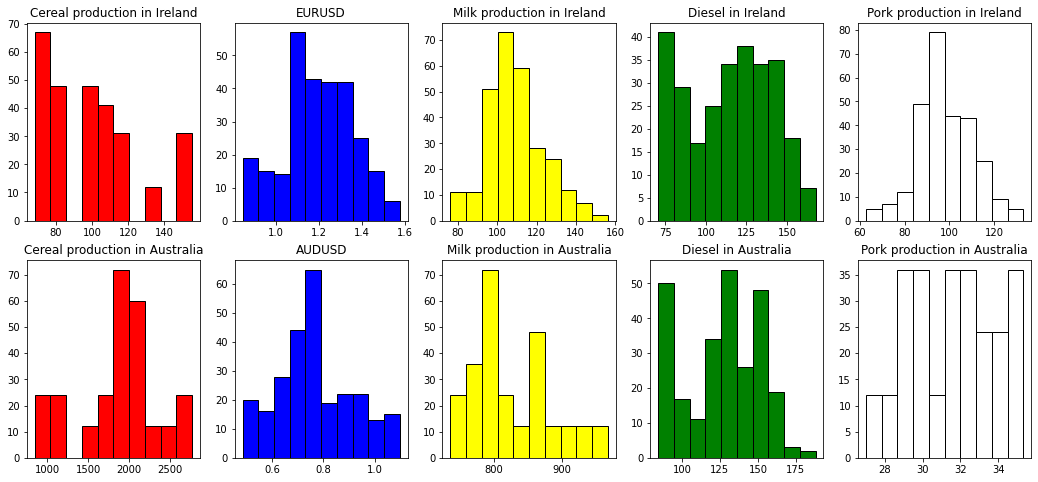

In [16]:
fig, axs = plt.subplots(2, 5, figsize=(18,8))

# cereal
axs[0,0].hist(non_scaled_irish['cereals'], color = 'red', ec = 'black')
axs[0,0].set_title('Cereal production in Ireland')
axs[1,0].hist(non_scaled_australian['wheat_production'], color = 'red', ec = 'black')
axs[1,0].set_title('Cereal production in Australia')


# currencies
axs[0,1].hist(non_scaled_irish['eurusd'], color = 'blue', ec = 'black')
axs[0,1].set_title('EURUSD')
axs[1,1].hist(non_scaled_australian['audusd'], color = 'blue', ec = 'black')
axs[1,1].set_title('AUDUSD')

# milk
axs[0,2].hist(non_scaled_irish['milk'], color = 'yellow', ec = 'black') 
axs[0,2].set_title('Milk production in Ireland')
axs[1,2].hist(non_scaled_australian['milk_production'], color = 'yellow', ec = 'black')
axs[1,2].set_title('Milk production in Australia')

# diesel
axs[0,3].hist(non_scaled_irish['diesel'], color = 'green', ec = 'black')
axs[0,3].set_title('Diesel in Ireland')
axs[1,3].hist(non_scaled_australian['diesel'], color = 'green', ec = 'black')
axs[1,3].set_title('Diesel in Australia')

# pig
axs[0,4].hist(non_scaled_irish['pigs'], color = 'white', ec = 'black') 
axs[0,4].set_title('Pork production in Ireland')
axs[1,4].hist(non_scaled_australian['swine_production_x'], color = 'white', ec = 'black')
axs[1,4].set_title('Pork production in Australia')

plt.show()

# Test for normality

The Shapiro Wilks test is used for testing the normality of each variable in the dataset.

The hypothesis of the shapiro wilks test is as follows:

H0: Variable is normally distributed

H1: Variable is not normally ditributed

If p <= 0.05, then the H0 hyp. can be rejected, the variable is not normally distributed

If p > 0.05, then the H0 hyp. cannot be rejected

In [17]:
# Irish features / variables
for i in range (irish.shape[1]):
    if(stats.shapiro(irish.iloc[:,i]).pvalue > 0.05):
        print(irish.columns[i], "is normally distributed. pvalue: ", stats.shapiro(irish.iloc[:,i]).pvalue)

None of the Irish variables are normally distributed so we can't apply t-test and ANOVA on there

In [18]:
# Australian features / variables
for i in range (australian.shape[1]):
    if(stats.shapiro(australian.iloc[:,i]).pvalue > 0.05):
        print()
        print(australian.columns[i], 'is normally distributed. pvalue:',stats.shapiro(australian.iloc[:,i]).pvalue )


cattle_exclud_calves_prod is normally distributed. pvalue: 0.11719152331352234

total_beef_prod is normally distributed. pvalue: 0.4881772994995117

bulls_bullocks_steers_slaughterings is normally distributed. pvalue: 0.08160652220249176

cows_heifers_slaughterings is normally distributed. pvalue: 0.2480727732181549

pig_slaughterings is normally distributed. pvalue: 0.5207580327987671


The shapiro-Wilks test has determined that some of the Australian data actually happens to be normally distributed (see above) so we will be able to apply t-test and ANOVA to these.

## Probability Plots and Q-Q plots

Let's confirm cattle_exclud_calves_prod, total_beef_prod, bulls_bullocks_steers_slaughterings, cows_heifers_slaughterings and pig_slaughterings are normally distributed using a probability plot from scipy.stats.probplot and Q-Q plot from statsmodels.api.

This is useful for the people who like visuals.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html

"Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.""

## cattle_exclud_calves_prod

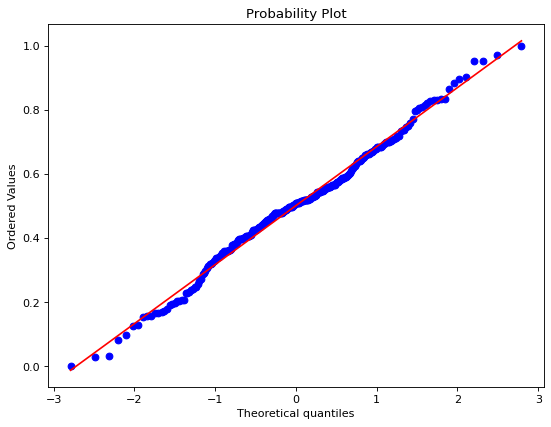

In [19]:
figure(figsize=(8, 6), dpi=80)
stats.probplot(australian['cattle_exclud_calves_prod'], dist="norm", plot=plt)
plt.show()

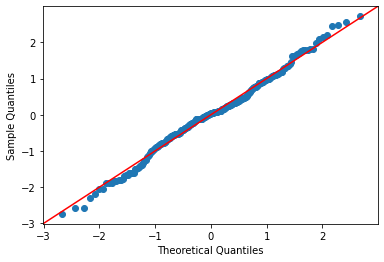

In [20]:
# QQ plot looks good
sm.qqplot(australian['cattle_exclud_calves_prod'], fit=True, line="45")
pylab.show()

## total_beef_prod

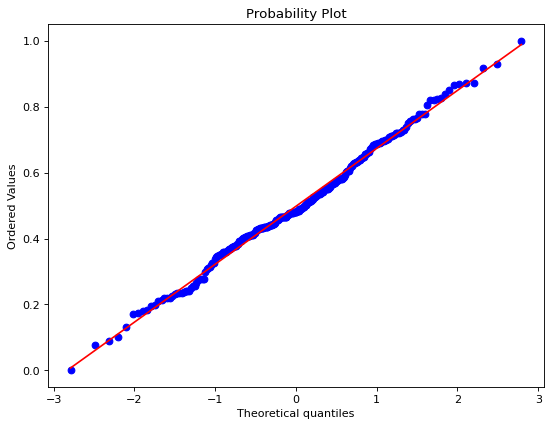

In [21]:
figure(figsize=(8, 6), dpi=80)
stats.probplot(australian['total_beef_prod'], dist="norm", plot=plt)
plt.show()

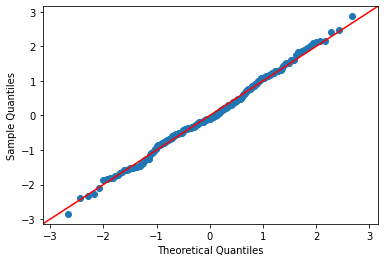

In [22]:
sm.qqplot(australian['total_beef_prod'], fit=True, line="45")
pylab.show()

## bulls_bullocks_steers_slaughterings

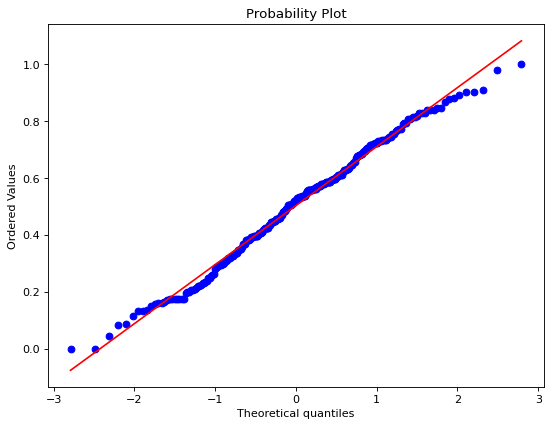

In [23]:
figure(figsize=(8, 6), dpi=80)
stats.probplot(australian['bulls_bullocks_steers_slaughterings'], dist="norm", plot=plt)
plt.show()

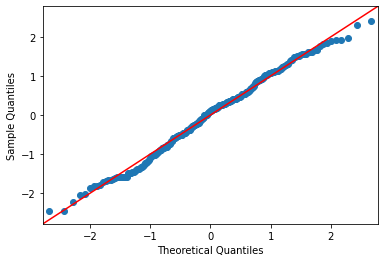

In [24]:
sm.qqplot(australian['bulls_bullocks_steers_slaughterings'], fit=True, line="45")
pylab.show()

## cows_heifers_slaughterings

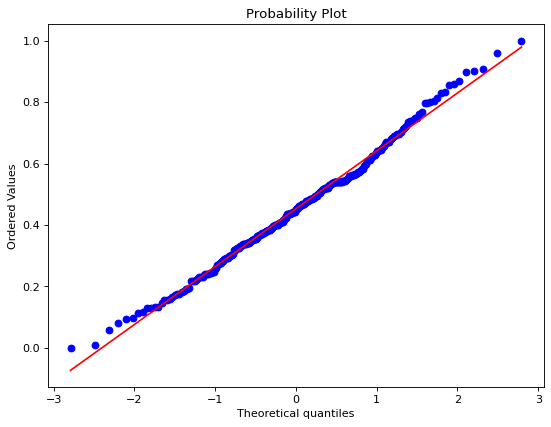

In [25]:
figure(figsize=(8, 6), dpi=80)
stats.probplot(australian['cows_heifers_slaughterings'], dist="norm", plot=plt)
plt.show()

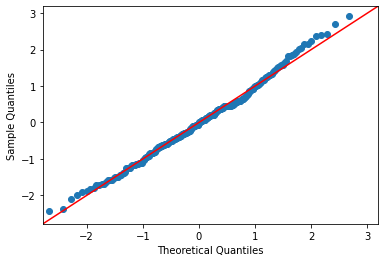

In [26]:
sm.qqplot(australian['cows_heifers_slaughterings'], fit=True, line="45")
pylab.show()

## pig_slaughterings

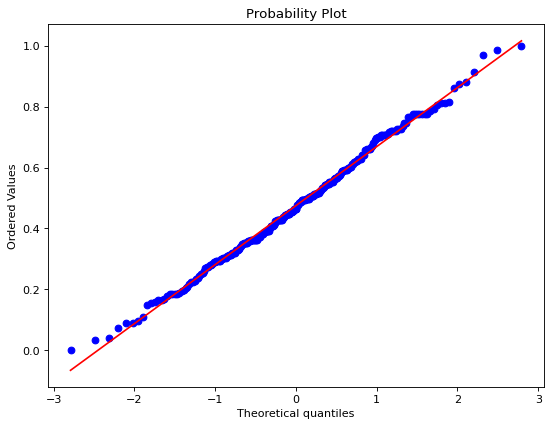

In [27]:
figure(figsize=(8, 6), dpi=80)
stats.probplot(australian['pig_slaughterings'], dist="norm", plot=plt)
plt.show()

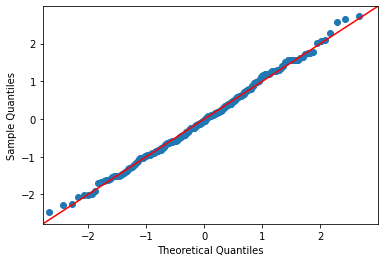

In [28]:
sm.qqplot(australian['pig_slaughterings'], fit=True, line="45")
pylab.show()

As can be seen from the qq graphs and shapiro wilks normality test, the
cattle_exclud_calves_prod, total_beef_prod, bulls_bullocks_steers_slaughterings,
cows_heifers_slaughterings, pig_slaughterings variables are distributed normal.

QQ plot is a method to see the distribution of the variable. If almost all the dots converge 
to the line, it means that the distribution is normal. But it is not a decision maker. The
results of the shapiro wilks tests proves to us the normality of those 5 variables. These are
just illustrations.

# t-test

T test is used for testing the means of two independent variables, if they are the same mean or not
requires an assumption of normality. All the variables tested here have been proved to have normal distributions by shapiro-wilks test (see above).

The hypotheses are:

**H0: Two variables have equal mean**

**H1: Two variables do not have equal mean**

If the pvalue of the test is < 0.05, H0 will be rejected

## Independent T test for equal means

In [29]:
def t_test(col_name_a, col_name_b):
    tprob = stats.ttest_ind(australian[col_name_a], australian[col_name_b])[1]
    if(tprob > 0.05):
        print(col_name_a, "and", col_name_b, "have equal means at the 95% confidence level.")
    else:
        print("H0 is rejected. p value is < 0.05.")
        print(col_name_a, "and", col_name_b, "do not share the same mean.")
    print("p-value:", tprob)

In [30]:
t_test('bulls_bullocks_steers_slaughterings', 'cows_heifers_slaughterings')

H0 is rejected. p value is < 0.05.
bulls_bullocks_steers_slaughterings and cows_heifers_slaughterings do not share the same mean.
p-value: 0.0030800109769685865


In [31]:
t_test('bulls_bullocks_steers_slaughterings', 'pig_slaughterings')

bulls_bullocks_steers_slaughterings and pig_slaughterings have equal means at the 95% confidence level.
p-value: 0.0980557273945164


In [32]:
t_test('cows_heifers_slaughterings', 'pig_slaughterings')

cows_heifers_slaughterings and pig_slaughterings have equal means at the 95% confidence level.
p-value: 0.17919951082811925


# One way ANOVA F test

One way ANOVA F test is used for testing the means of two independent variables, if the are the same or not.

Requires normality.

The hypotheses are:

**H0: Two variables have equal means**

**H1: Two variables do not have equal means**

If the pvalue of the test is < 0.05, H0 will be rejected

## F test for equal means

In [33]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
def anovo_test(col_name_a, col_name_b):
    fprob = stats.f_oneway(australian[col_name_a], australian[col_name_b])[1]
    print(fprob)
    if(fprob > 0.05):
        print(col_name_a, "and", col_name_b, "have equal means at the 95% confidence level.")
    else:
        print("H0 is rejected. p value is < 0.05.")
        print(col_name_a, "and", col_name_b, "do not share the same mean.")
    print("p-value:", fprob)

In [34]:
anovo_test('bulls_bullocks_steers_slaughterings', 'cows_heifers_slaughterings')

0.003080010976968385
H0 is rejected. p value is < 0.05.
bulls_bullocks_steers_slaughterings and cows_heifers_slaughterings do not share the same mean.
p-value: 0.003080010976968385


In [35]:
anovo_test('bulls_bullocks_steers_slaughterings', 'pig_slaughterings')

0.09805572739451303
bulls_bullocks_steers_slaughterings and pig_slaughterings have equal means at the 95% confidence level.
p-value: 0.09805572739451303


In [36]:
anovo_test('cows_heifers_slaughterings', 'pig_slaughterings')

0.1791995108281025
cows_heifers_slaughterings and pig_slaughterings have equal means at the 95% confidence level.
p-value: 0.1791995108281025


In [37]:
# anova test on three groups
fprob = stats.f_oneway(australian['bulls_bullocks_steers_slaughterings'], australian['cows_heifers_slaughterings'], australian['pig_slaughterings'])[1]
if(fprob > 0.05):
    print("bulls_bullocks_steers_slaughterings, cows_heifers_slaughterings and pig_slaughterings have equal means at the 95% confidence level.")
else:
    print("H0 is rejected. p value is < 0.05.")
    print("bulls_bullocks_steers_slaughterings, cows_heifers_slaughterings and pig_slaughterings do not share the same mean.")
print("p-value:", fprob)

H0 is rejected. p value is < 0.05.
bulls_bullocks_steers_slaughterings, cows_heifers_slaughterings and pig_slaughterings do not share the same mean.
p-value: 0.011221929255613505


# f-test

F test is used for testing the **variances** of two independent variables, if they are the same or not.

Requires normality

The hypotheses are:

**H0: Two variables have equal variances**

**H1: Two variables do not have equal variances**

If the pvalue of the test is < 0.05, H0 will be rejected

In [38]:
# Ref for f_test code: https://www.geeksforgeeks.org/how-to-perform-an-f-test-in-python/ 
def f_test(x1, x2):
    f = np.var(x1, ddof=1)/np.var(x2, ddof=1)                   
    dof1 = x1.size-1
    dof2 = x2.size-1
    p_value = 1-scipy.stats.f.cdf(f, dof1, dof2)
    return p_value

In [39]:
def run_f_test(col_name_a, col_name_b):
    fprob = f_test(australian[col_name_a], australian[col_name_b])
    if(fprob >= 0.05):
        print(col_name_a, "and", col_name_b, "have equal variances at the 95% confidence level.")
    else:
        print("H0 is rejected. p value is < 0.05.")
        print(col_name_a, "and", col_name_b, "do not share the same variance.")
    print("p-value:", fprob)

In [40]:
run_f_test('bulls_bullocks_steers_slaughterings', 'cows_heifers_slaughterings')

bulls_bullocks_steers_slaughterings and cows_heifers_slaughterings have equal variances at the 95% confidence level.
p-value: 0.061936538036401534


In [41]:
run_f_test('bulls_bullocks_steers_slaughterings', 'pig_slaughterings')

bulls_bullocks_steers_slaughterings and pig_slaughterings have equal variances at the 95% confidence level.
p-value: 0.13069313793484083


In [42]:
run_f_test('cows_heifers_slaughterings', 'pig_slaughterings')

cows_heifers_slaughterings and pig_slaughterings have equal variances at the 95% confidence level.
p-value: 0.66139786934244


# Mann Whitney U 

Two independent groups, test for equal medians. Since, the sample sizes are not equal, mannwhitney is preferred and the variables are both not normally distributed. 

**H0: Two variables have equal medians**

**H1: Two variables do not have equal medians**


If the pvalue of the test is < 0.05, H0 will be rejected

Mann Whitney U Test for Equal Medians

In [43]:
# compare irish variables against their australian equivalant
def mannwhit(col_name_ie, col_name_au):
    mannwhit_p = stats.mannwhitneyu(irish[col_name_ie], australian[col_name_au])
    if(mannwhit_p[1] > 0.05):
        print(col_name_ie, "and", col_name_au, "have equal medians at the 95% confidence level.")
    else:
        print("H0 is rejected. p value is < 0.05.")
        print(col_name_ie, "and", col_name_au, "do not share the same median.")
    print("p-value:", mannwhit_p[1])

In [44]:
mannwhit('cereals', 'wheat_production')

H0 is rejected. p value is < 0.05.
cereals and wheat_production do not share the same median.
p-value: 3.4322185643755764e-14


In [45]:
mannwhit('eurusd', 'audusd')

eurusd and audusd have equal medians at the 95% confidence level.
p-value: 0.15878675220908844


In [46]:
mannwhit('milk', 'milk_production')

H0 is rejected. p value is < 0.05.
milk and milk_production do not share the same median.
p-value: 0.007504249444978873


In [47]:
mannwhit('diesel', 'diesel')

diesel and diesel have equal medians at the 95% confidence level.
p-value: 0.05090962309217117


In [48]:
mannwhit('pigs', 'swine_production_x')

pigs and swine_production_x have equal medians at the 95% confidence level.
p-value: 0.11553261185711351


# kruskall wallis

Use kruskall wallis to verify mann whitney test. 

As these variables do not have normally distributed data a nonparametric test is needed.

The hypotheses are:

**H0: Two variables has equal medians**

**H1: Two variables do not have equal medians**


If the pvalue of the test is < 0.05, H0 will be rejected

Kruskall Wallis Test for Equal Medians

In [49]:
# compare irish variables against their australian equivalant
def kruskall_wallis(col_name_ie, col_name_au):
    kwallis_p = stats.kruskal(irish[col_name_ie], australian[col_name_au])
    if(kwallis_p[1] > 0.05):
        print(col_name_ie, "and", col_name_au, "have equal medians at the 95% confidence level.")
    else:
        print("H0 is rejected. p value is < 0.05.")
        print(col_name_ie, "and", col_name_au, "do not share the same median.")
    print("p-value:", kwallis_p[1])

In [50]:
kruskall_wallis('cereals', 'wheat_production')

H0 is rejected. p value is < 0.05.
cereals and wheat_production do not share the same median.
p-value: 3.424965110059294e-14


In [51]:
kruskall_wallis('eurusd', 'audusd')

eurusd and audusd have equal medians at the 95% confidence level.
p-value: 0.15870565721457708


In [52]:
kruskall_wallis('milk', 'milk_production')

H0 is rejected. p value is < 0.05.
milk and milk_production do not share the same median.
p-value: 0.007498111981516808


In [53]:
kruskall_wallis('diesel', 'diesel')

diesel and diesel have equal medians at the 95% confidence level.
p-value: 0.050877070837225244


In [54]:
kruskall_wallis('pigs', 'swine_production_x')

pigs and swine_production_x have equal medians at the 95% confidence level.
p-value: 0.11546916353852617


In [55]:
# perform Kruskall Wallis on a group
kwallis_p = stats.kruskal(irish['cereals'], australian['wheat_production'], irish['pigs'], australian['swine_production_x'])
if(kwallis_p[1] > 0.05):
    print("cereals, wheat_production, pigs and swine_production_x have equal medians at the 95% confidence level.")
else:
    print("H0 is rejected. p value is < 0.05.")
    print("cereals, wheat_production, pigs and swine_production_x do not share the same median.")
print("p-value:", "{:.10f}".format(kwallis_p[1]))

H0 is rejected. p value is < 0.05.
cereals, wheat_production, pigs and swine_production_x do not share the same median.
p-value: 0.0000000000


# Levene

Levene's test is a nonparametric test to test the equality of variances between groups that come from non-normal distributions.

Since it does not require normality; it can be used on the same data that was used to compare the medians in mann whitney.

**H0: Variances of the two groups are equal**

**H1: Variances of the two groups are not equal**

Ref: https://www.statisticshowto.com/levene-test/

Levene Test for Equal Variances

In [56]:
def levene(col_name_ie, col_name_au):
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    levene_p = stats.levene(irish[col_name_ie], australian[col_name_au])
    if(levene_p[1] > 0.05):
        print(col_name_ie, "and", col_name_au, "have equal variances at the 95% confidence level.")
    else:
        print("H0 is rejected. p value is < 0.05.")
        print(col_name_ie, "and", col_name_au, "do not share the same variance.")
    print("p-value:", levene_p[1])

In [57]:
levene('cereals', 'wheat_production')

H0 is rejected. p value is < 0.05.
cereals and wheat_production do not share the same variance.
p-value: 0.0007748394988677446


In [58]:
levene('eurusd', 'audusd')

eurusd and audusd have equal variances at the 95% confidence level.
p-value: 0.4189957026715744


In [59]:
levene('milk', 'milk_production')

H0 is rejected. p value is < 0.05.
milk and milk_production do not share the same variance.
p-value: 2.144504645394333e-08


In [60]:
levene('diesel', 'diesel')

H0 is rejected. p value is < 0.05.
diesel and diesel do not share the same variance.
p-value: 0.002469249360205069


In [61]:
levene('pigs', 'swine_production_x')

H0 is rejected. p value is < 0.05.
pigs and swine_production_x do not share the same variance.
p-value: 2.9827753473272288e-15


# Spearman

Spearman tests the correlation between the independent and response variable and the significance of the independent variable.

If the correlation is significant, then it means that it has an impact to the response varible and the variable is important 
for the dataset.

Does not assume that both datasets are normally distributed

hypotheses:
    
**H0: The correlation is statistically significant**

**H1: The correlation is not statistically significant**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

Spearman Test for Significance

In [87]:
print('Australian variables that are statistically significant for the model.\n')
for i in range (australian.shape[1]):
    spearmanr = stats.spearmanr(target_australian, australian.iloc[:,i])[1]
    if(spearmanr > 0.05):
        print(f'{australian.columns[i]: <40}', 'p-value:', spearmanr)

Australian variables that are statistically significant for the model.

meat_consumption                         p-value: 0.4075577129167335
corn_production                          p-value: 0.25646237970965635
cheese_production                        p-value: 0.6071499104581952
millet_production                        p-value: 0.7390551516306605
wheat_production                         p-value: 0.1704955985447754
audusd                                   p-value: 0.5810130160533913
rain                                     p-value: 0.8220571561598029
sunshine                                 p-value: 0.7244384662858145
temp_cel                                 p-value: 0.24056515787047927
bulls_bullocks_steers_slaughterings      p-value: 0.6853331029851208
pig_slaughterings                        p-value: 0.7921877962640039


In [89]:
print('Irish variables that are statistically significant for the model.\n')
for i in range (irish.shape[1]):
    spearmanr = stats.spearmanr(target_irish, irish.iloc[:,i])[1]
    if(spearmanr > 0.05):
        print(f'{irish.columns[i]: <35}', 'p-value:', spearmanr)

Irish variables that are statistically significant for the model.

sunshine                            p-value: 0.3403164471136325
rain                                p-value: 0.8977721840273233
temp                                p-value: 0.3255437630550555
food_and_non-alcoholic_beverages    p-value: 0.06075683460381737
carrots_per_kg                      p-value: 0.9059407480202826
jam_per_lb                          p-value: 0.3518619005500975
mushrooms_per_kg                    p-value: 0.3845666026011241
